In [1]:
import json
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
from scipy.io.idl import readsav
import scipy.signal as signal
from scipy.interpolate import BSpline, make_lsq_spline

if '../lib' not in sys.path:
    sys.path.append('../lib')
import snelib19odp.specsmooth as specsmooth
import snelib19odp.dataloader as dataloader

In [2]:
spec = dataloader.load_obs_spec('ZTF19abqwtfu_20190823_NTT_v1.ascii')

In [4]:
xryt = table.Table.read('/home/welterde/mess/2021/38/ZTF20aatxryt_20200720_Keck1_v1.ascii', format='ascii')
xryt

<Table length=5114>
   col1       col2         col3    ...   col6         col7          col8 
 float64    float64      float64   ... float64      float64       float64
--------- ------------ ----------- ... ------- ------------------ -------
3075.8821 -7.46175e-17 6.55468e-16 ...  109.72  165291000000000.0     0.0
3077.8325 -5.30312e-17 4.96915e-16 ... 109.722  171903000000000.0     0.0
3079.7837  3.35362e-16 6.14792e-16 ... 109.725  178539000000000.0     0.0
3081.7351 -1.51407e-16 6.16894e-16 ... 109.727  184976000000000.0     0.0
3083.6873  1.15422e-16 4.59374e-16 ...  109.73  191212000000000.0     0.0
3085.6401  1.58109e-16 3.97695e-16 ... 109.732  197323000000000.0     0.0
3087.5935 -1.89621e-18 4.27339e-16 ... 109.735  203647000000000.0     0.0
3089.5476  2.66227e-17 4.49838e-16 ... 109.738  210367000000000.0     0.0
3091.5022  2.21451e-16 4.32752e-16 ...  109.74  217246000000000.0     0.0
3093.4573  4.95966e-17 2.86134e-16 ... 109.743  224265000000000.0     0.0
      ...          ...         ... ...     ...                ...     ...
10293.527  3.22193e-17 1.20906e-15 ...  74.386 4366710000000000.0     0.0
10294.714  9.92952e-17 1.25831e-15 ...   74.39 4333830000000000.0     0.0
  10295.9  7.04682e-17 1.24978e-15 ...  74.393 4302100000000000.0     0.0
10297.087  1.22666e-17 1.20451e-15 ...  74.396 4270890000000000.0     0.0
10298.274  2.76006e-17 1.11261e-15 ...  74.399 4239840000000000.0     0.0
10299.461  4.97617e-17  8.8952e-16 ...  74.402 4208880000000000.0     0.0
10300.648  4.41645e-17  6.3265e-16 ...  74.405 4179520000000000.0     0.0
10301.834 -8.65562e-18 5.66286e-16 ...  74.408 4151010000000000.0     0.0
10303.021  7.11065e-17 5.22507e-16 ...  74.411 4122790000000000.0     0.0
10304.208  7.35301e-18 5.51308e-16 ...  74.415 4095390000000000.0     0.0

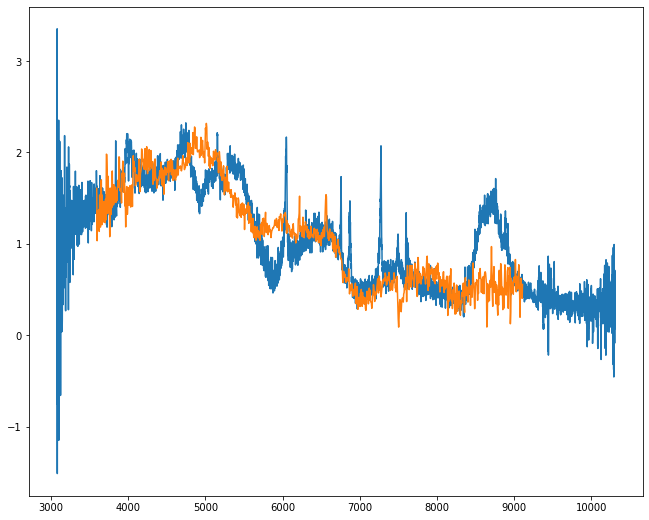

In [7]:
plt.figure(figsize=(11,9))
plt.plot(xryt['col1'], xryt['col2']*1e16)
plt.plot(spec['restwave'], spec['flux']*1e16)